In [147]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
# Menampilkan Dataset

df = pd.read_csv('NYC TLC Trip Record.csv')
df

C:\Users\Herry Rangkuti\AppData\Local\Temp\ipykernel_14564\80218840.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [149]:
# Melihat Missing Values pada Dataset

df.isna().sum()/len(df)*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

In [150]:
# Menghapus duplikasi yang terdapat di Dataset

df = df.drop_duplicates()

In [151]:
# Menghapus baris dengan nilai yang hilang (NaN) di kolom penting

df = df.dropna(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])
df=df.dropna(subset = ['store_and_fwd_flag'])


In [152]:
# Menghapus baris yang tidak dapat diubah menjadi datetime

df = df.dropna(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])

In [153]:
# Mengonversi kolom datetime ke format datetime Pandas

df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce' )
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors = 'coerce' )


In [154]:
# Mengisi nilai hilang pada kolom numerik dengan 0

numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(0)


In [155]:
# Mengonversi kolom kategori ke tipe data kategori

df['VendorID'] = df['VendorID'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['trip_type'] = df['trip_type'].astype('category')


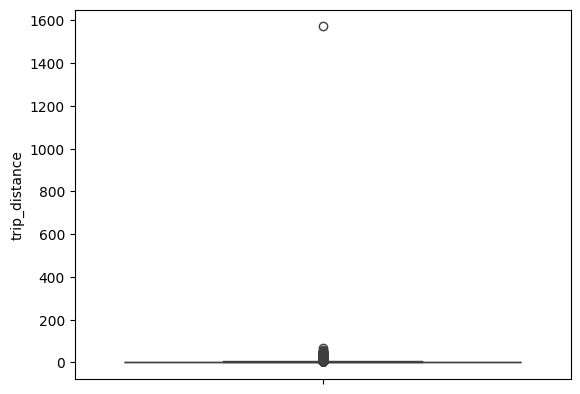

In [156]:
# Mengecek Outliers pada kolom "trip_distance"

sns.boxplot(df["trip_distance"])
plt.show()

# Kesimpulan : Outliers di 1600 perlu dihapus

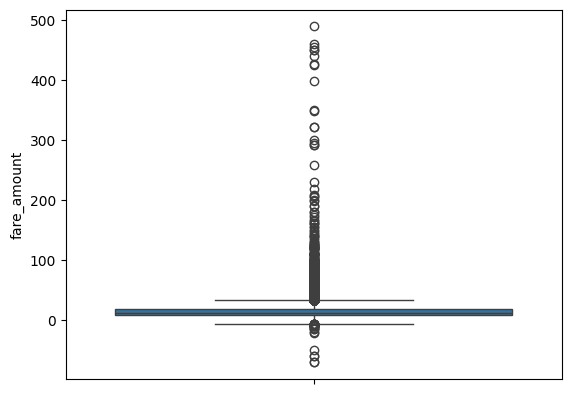

In [157]:
# Mengecek Outliers pada kolom "fare_amount"
sns.boxplot(df["fare_amount"])
plt.show()

# Kesimpulan : Outliers tidak perlu dihapus karena masih berhimpitan

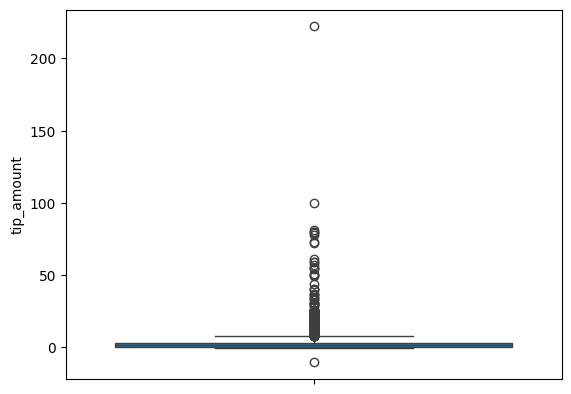

In [158]:
# Mengecek Outliers pada kolom "tip_amount"

sns.boxplot(df["tip_amount"])
plt.show()

# Kesimpulan : Outliers > 200 perlu dihapus

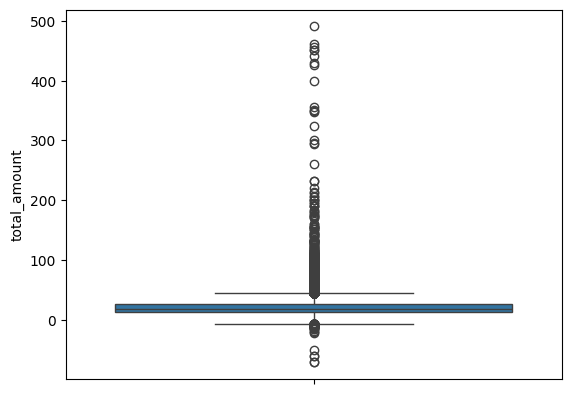

In [159]:
# Mengecek Outliers pada kolom "total_amount"

sns.boxplot(df["total_amount"])
plt.show()

# Kesimpulan : Outliers tidak perlu dihapus karena masih berhimpitan

In [160]:
# Menghapus Outliers yang terdapat pada kolom "trip_distance" , tip_amount

df["trip_distance"] = df["trip_distance"] < 16000
df["tip_amount"] = df["tip_amount"] < 200



In [161]:
# Drop Kolom "ehail_fee" karena value nya hanya 0 

df.drop(columns=['ehail_fee'], inplace=True)

In [162]:
# Menampilkan Data yang telah dibersihkan
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,True,14.9,1.0,0.5,True,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,True,10.7,1.0,0.5,True,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,True,7.2,1.0,0.5,True,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,True,6.5,0.5,1.5,True,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,True,6.0,0.5,1.5,True,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,True,15.0,0.0,0.0,True,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,True,13.5,1.0,0.5,True,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,True,9.3,1.0,0.5,True,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,True,13.5,1.0,0.5,True,0.0,1.0,22.50,1.0,1.0,2.75


In [163]:
# Missing Values sudah tidak ada sama sekali

df.isna().sum()/len(df)*100

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: float64

In [164]:
# Men save data yang sudah di cleaned untuk persiapan data visualisasi di Tableau
df.to_csv('cleaned_data_TLC.csv', index=False)


1. Grafik Permintaan Layanan Taksi Berdasarkan Jam

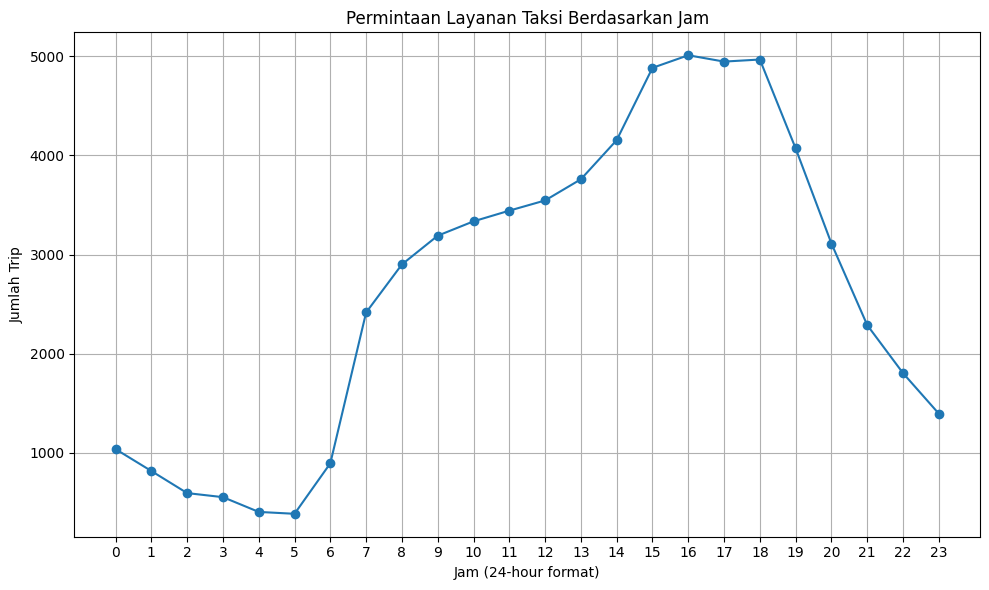

In [ ]:
 

# Menghitung permintaan layanan berdasarkan jam pickup
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
hourly_demand = df['pickup_hour'].value_counts().sort_index()

# Plot menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(hourly_demand.index, hourly_demand.values, marker='o')
plt.title("Permintaan Layanan Taksi Berdasarkan Jam")
plt.xlabel("Jam (24-hour format)")
plt.ylabel("Jumlah Trip")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

2. Histogram Distribusi Durasi Perjalanan

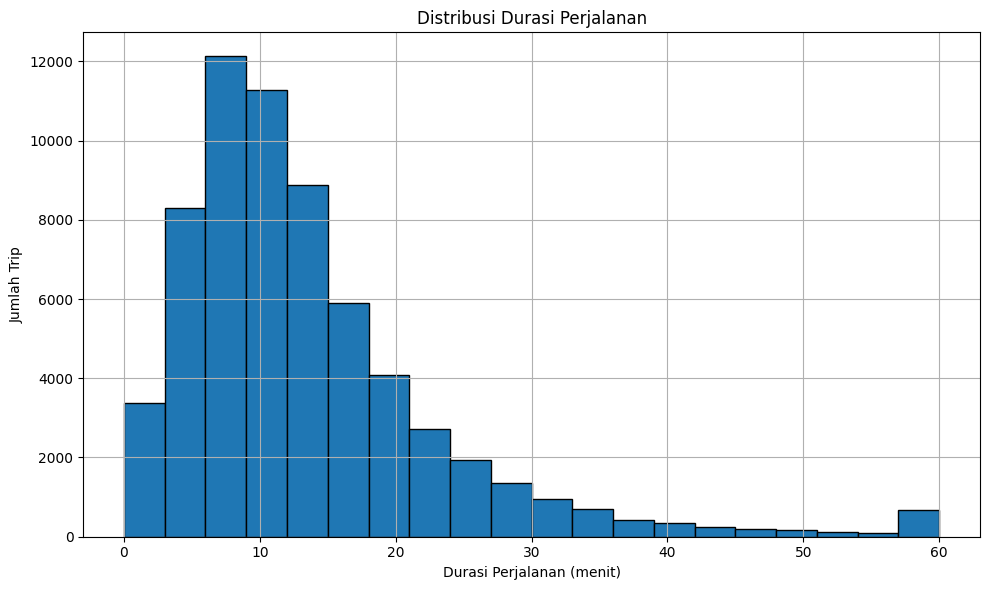

In [ ]:

# Durasi perjalanan dalam menit
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
trip_duration_dist = df['trip_duration'].clip(upper=60)  # Batasi durasi pada 60 menit

# Plot menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(trip_duration_dist, bins=20, edgecolor='black')
plt.title("Distribusi Durasi Perjalanan")
plt.xlabel("Durasi Perjalanan (menit)")
plt.ylabel("Jumlah Trip")
plt.grid(True)
plt.tight_layout()
plt.show()





3. Grafik Pendapatan Harian

C:\Users\Herry Rangkuti\AppData\Local\Temp\ipykernel_14564\405077503.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['pickup_date'] = df_2023['lpep_pickup_datetime'].dt.date


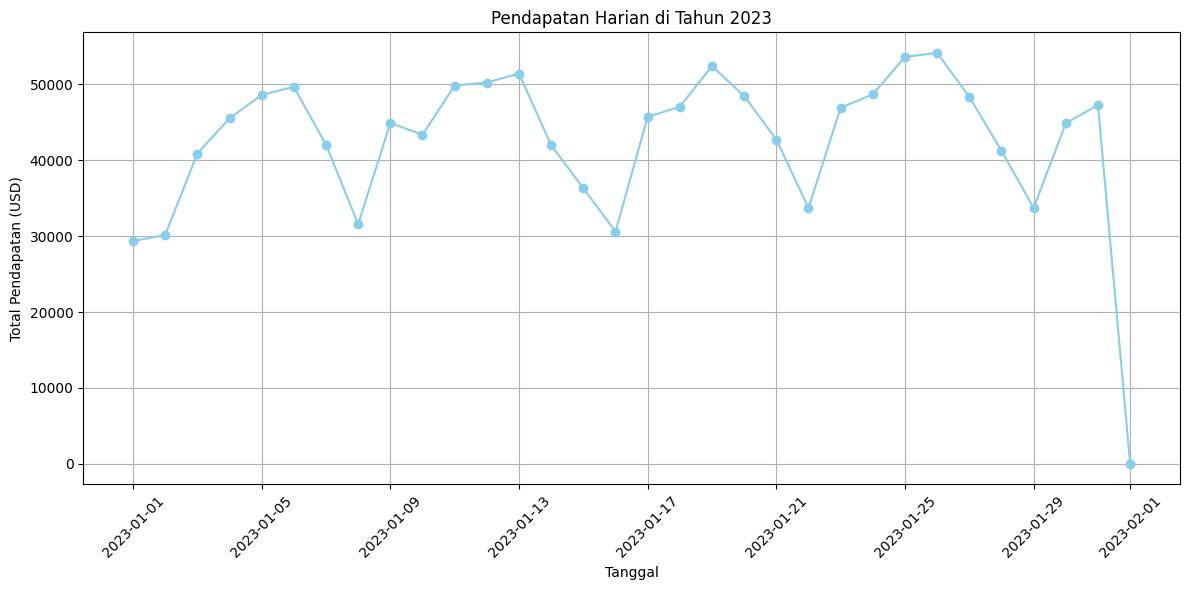

In [ ]:

df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')


df_2023 = df[df['lpep_pickup_datetime'].dt.year == 2023]


df_2023['pickup_date'] = df_2023['lpep_pickup_datetime'].dt.date
daily_revenue_2023 = df_2023.groupby('pickup_date')['total_amount'].sum()

# Plot daily revenue
plt.figure(figsize=(12, 6))
daily_revenue_2023.plot(kind='line', color='skyblue', marker='o')
plt.title("Pendapatan Harian di Tahun 2023")
plt.xlabel("Tanggal")
plt.ylabel("Total Pendapatan (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

4. Barplot Distribusi Jumlah Penumpang per Trip



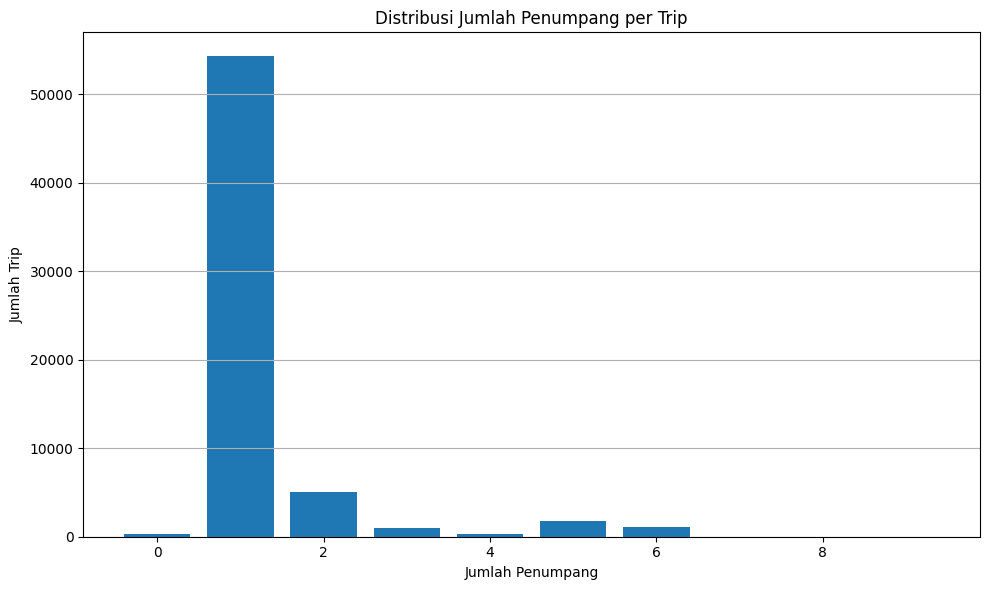

In [168]:
# Distribusi jumlah penumpang
passenger_count_dist = df['passenger_count'].value_counts().sort_index()

# Plot menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(passenger_count_dist.index, passenger_count_dist.values)
plt.title("Distribusi Jumlah Penumpang per Trip")
plt.xlabel("Jumlah Penumpang")
plt.ylabel("Jumlah Trip")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

5. Barplot Korelasi Faktor-faktor dengan Total Amount



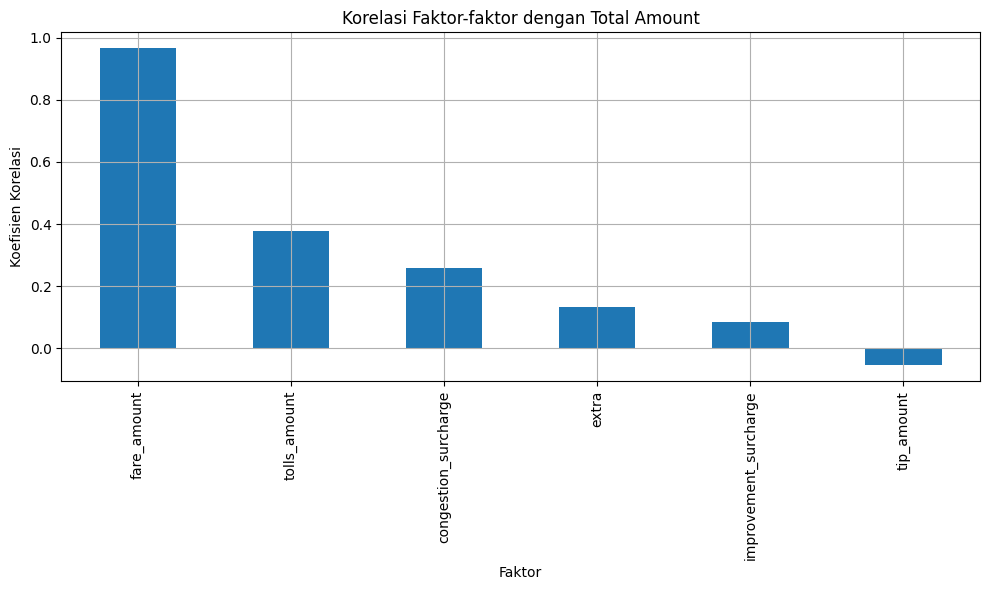

In [169]:
# Korelasi faktor-faktor dengan total_amount
correlation_matrix = df[['fare_amount', 'tip_amount', 'extra', 'tolls_amount', 
                         'improvement_surcharge', 'congestion_surcharge', 'total_amount']].corr()
correlation_with_total = correlation_matrix['total_amount'].drop('total_amount').sort_values(ascending=False)

# Plot menggunakan Matplotlib
plt.figure(figsize=(10, 6))
correlation_with_total.plot(kind='bar')
plt.title("Korelasi Faktor-faktor dengan Total Amount")
plt.xlabel("Faktor")
plt.ylabel("Koefisien Korelasi")
plt.grid(True)
plt.tight_layout()
plt.show()